In [1]:
import pandas as pd
import seaborn as sns

In [2]:
meta_df=pd.DataFrame(columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"])

In [3]:
def afficher_histogramme_et_enregistrer_stat(file,meta_df):
    df = pd.read_csv(file,header=None)
    df.columns=["biais de somme nulle"]
    sns.displot(df,kde=True)
    new_row_meta_df= pd.DataFrame(
            [(file,df["biais de somme nulle"].mean(),df["biais de somme nulle"].std()
             ,df["biais de somme nulle"].min()
            ,df["biais de somme nulle"].max()
            ,df["biais de somme nulle"].median()
             )],
            columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"],
        )
    meta_df=pd.concat([meta_df, new_row_meta_df])
    return meta_df

# Simulations Monte-Carlo

## Scenarios d'ajout cumulés et loi uniforme sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

* n=10 ajouts et m=12 entités

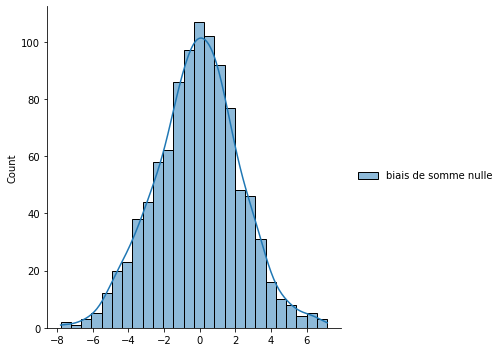

In [4]:
meta_df=afficher_histogramme_et_enregistrer_stat("score_clean.csv",meta_df)

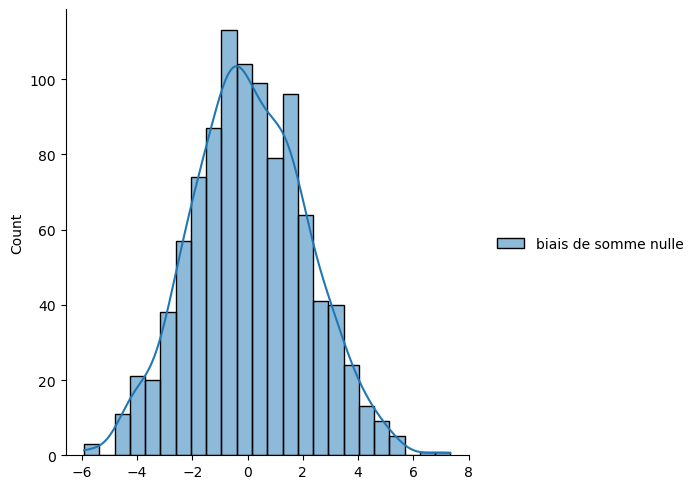

In [5]:
meta_df=afficher_histogramme_et_enregistrer_stat("score2_clean.csv",meta_df)

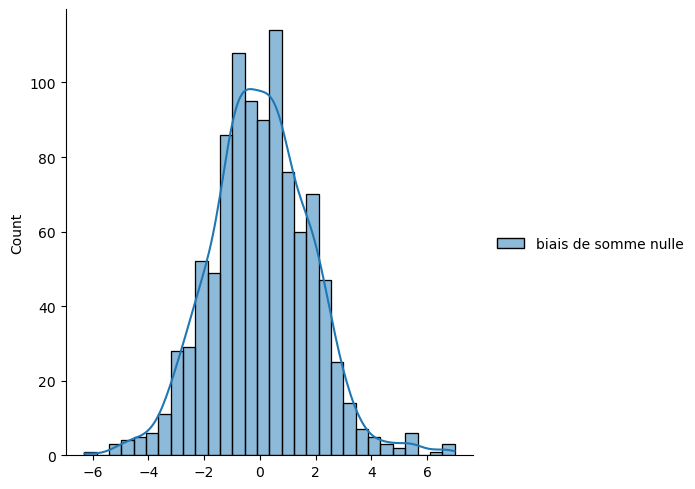

In [6]:
meta_df=afficher_histogramme_et_enregistrer_stat("score3_clean.csv",meta_df)

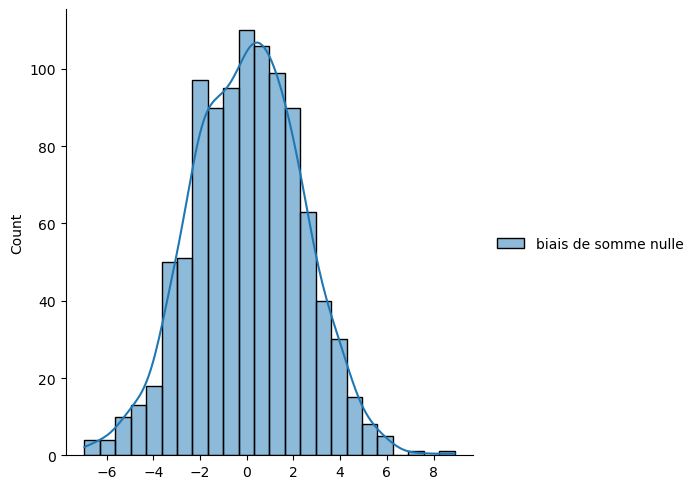

In [7]:
meta_df=afficher_histogramme_et_enregistrer_stat("score4_clean.csv",meta_df)

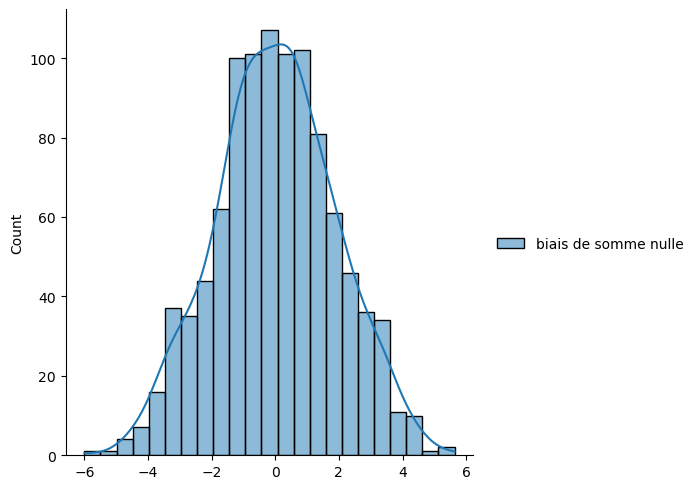

In [8]:
meta_df=afficher_histogramme_et_enregistrer_stat("score5_clean.csv",meta_df)

* n=10 ajouts et m=13* n=10 ajouts et m=12 entités entités

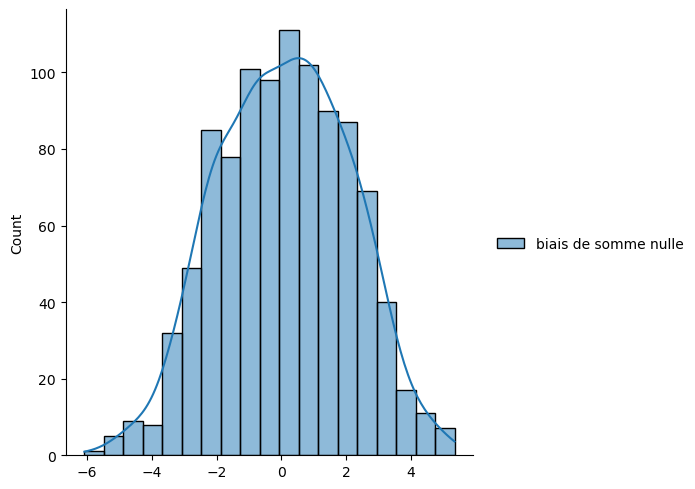

In [9]:
meta_df=afficher_histogramme_et_enregistrer_stat("13_entities_10_samples/score_13_1_clean.csv",meta_df)

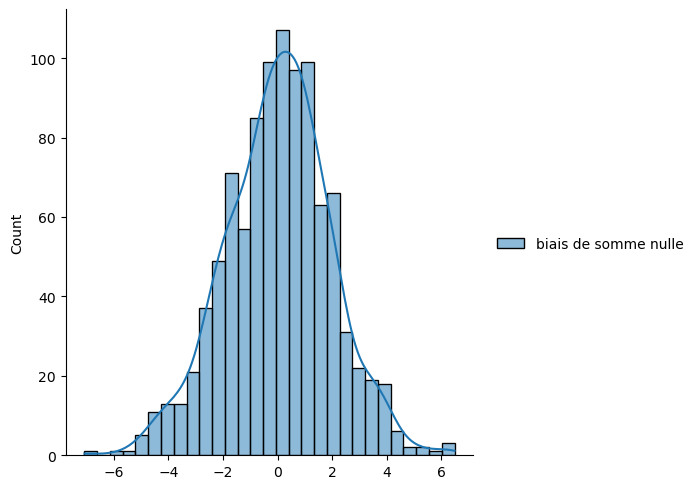

In [10]:
meta_df=afficher_histogramme_et_enregistrer_stat("13_entities_10_samples/score_13_2_clean.csv",meta_df)

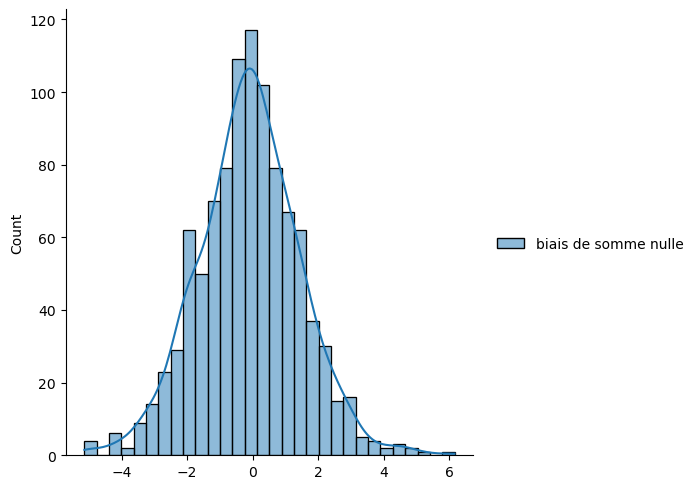

In [11]:
meta_df=afficher_histogramme_et_enregistrer_stat("13_entities_10_samples/score_13_3_clean.csv",meta_df)

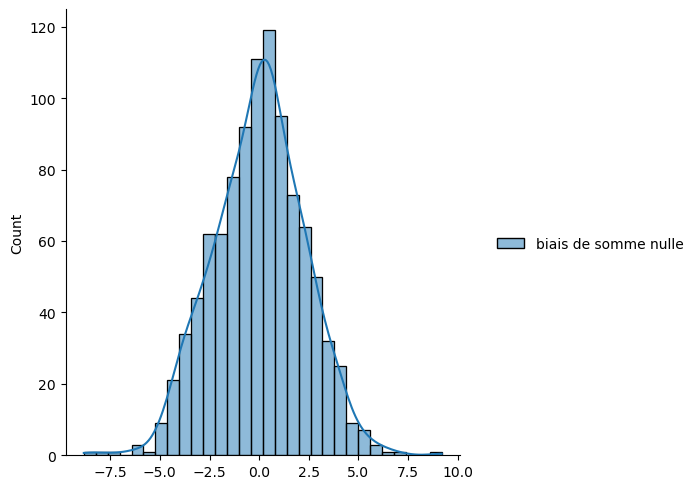

In [12]:
meta_df=afficher_histogramme_et_enregistrer_stat("13_entities_10_samples/score_13_4_clean.csv",meta_df)

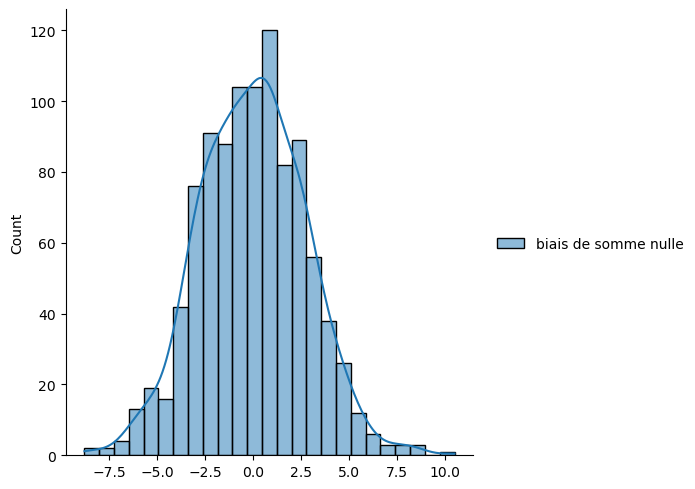

In [13]:
meta_df=afficher_histogramme_et_enregistrer_stat("13_entities_10_samples/score_13_5_clean.csv",meta_df)

* n=10 ajouts et m=20 entités

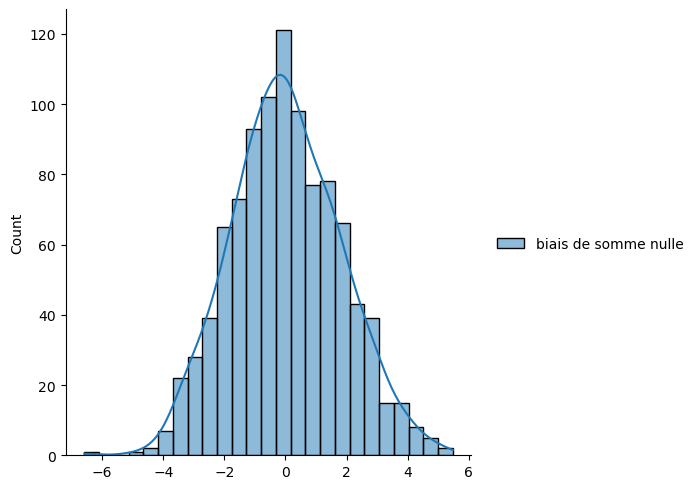

In [14]:
meta_df=afficher_histogramme_et_enregistrer_stat("20_entities_10_samples/score_20_1_clean.csv",meta_df)

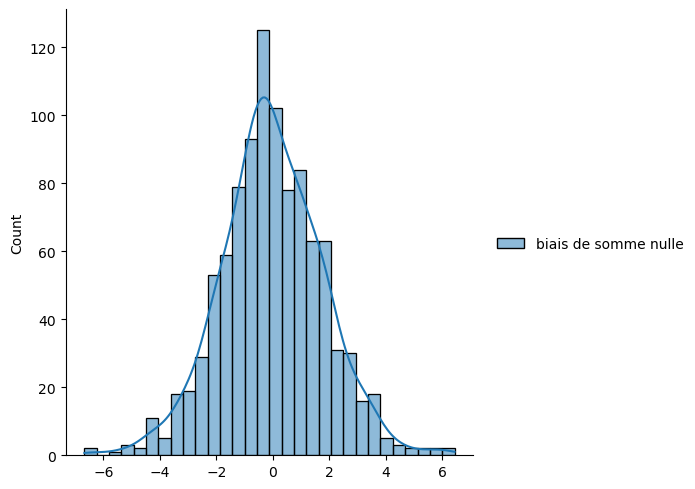

In [15]:
meta_df=afficher_histogramme_et_enregistrer_stat("20_entities_10_samples/score_20_2_clean.csv",meta_df)

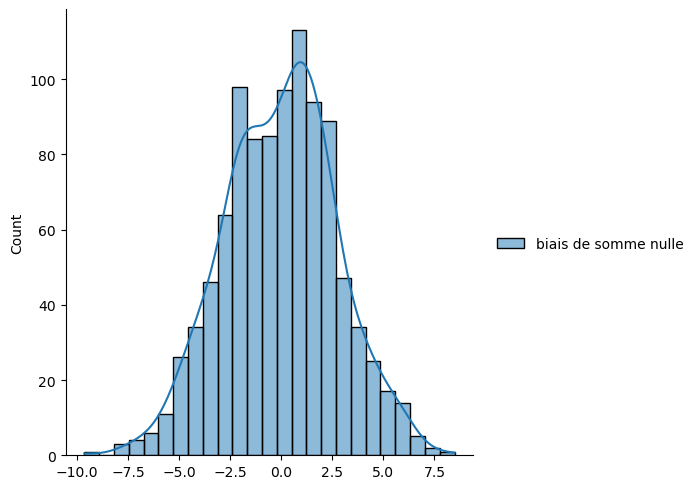

In [16]:
meta_df=afficher_histogramme_et_enregistrer_stat("20_entities_10_samples/score_20_3_clean.csv",meta_df)

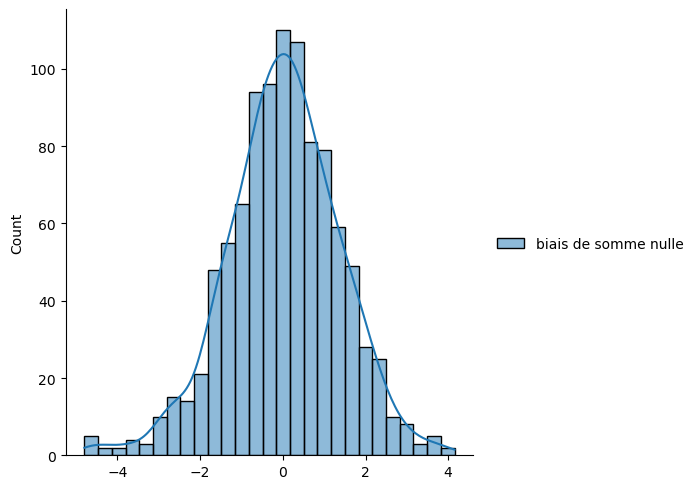

In [17]:
meta_df=afficher_histogramme_et_enregistrer_stat("20_entities_10_samples/score_20_4_clean.csv",meta_df)

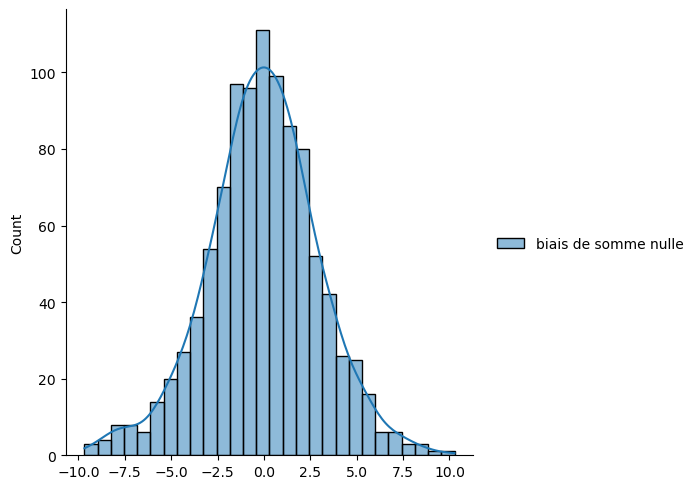

In [18]:
meta_df=afficher_histogramme_et_enregistrer_stat("20_entities_10_samples/score_20_5_clean.csv",meta_df)

* n=10 ajouts et m=100 entités

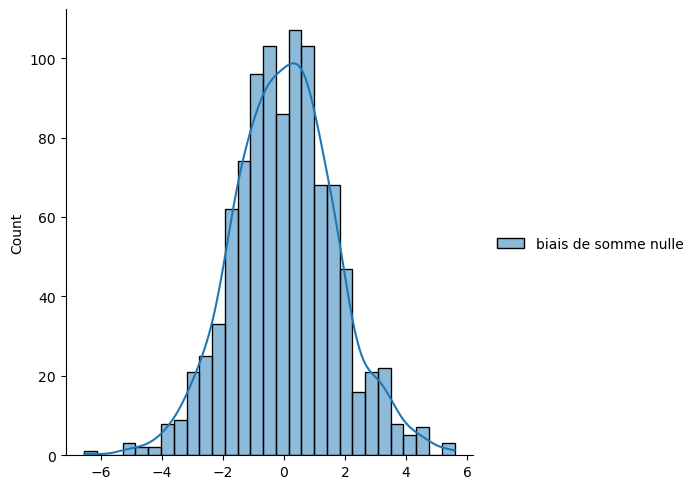

In [19]:
meta_df=afficher_histogramme_et_enregistrer_stat("100_entities_10_samples/score_100_10_1_clean.csv",meta_df)

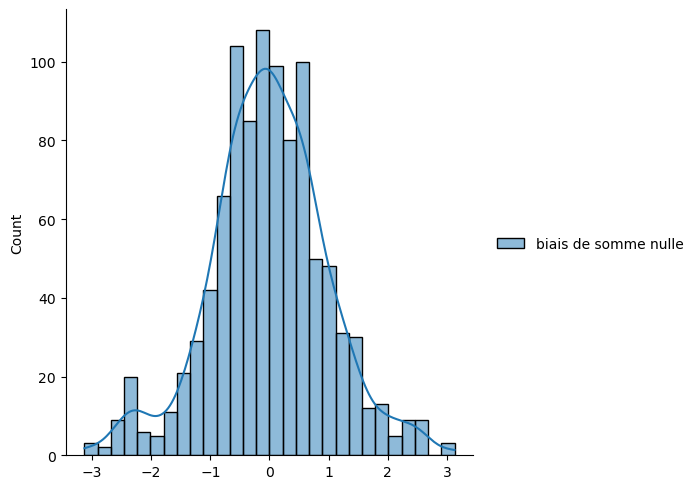

In [20]:
meta_df=afficher_histogramme_et_enregistrer_stat("100_entities_10_samples/score_100_10_2_clean.csv",meta_df)

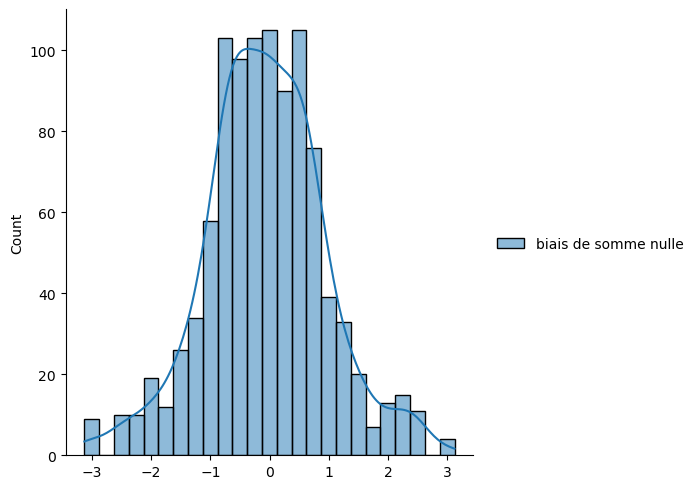

In [21]:
meta_df=afficher_histogramme_et_enregistrer_stat("100_entities_10_samples/score_100_10_3_clean.csv",meta_df)

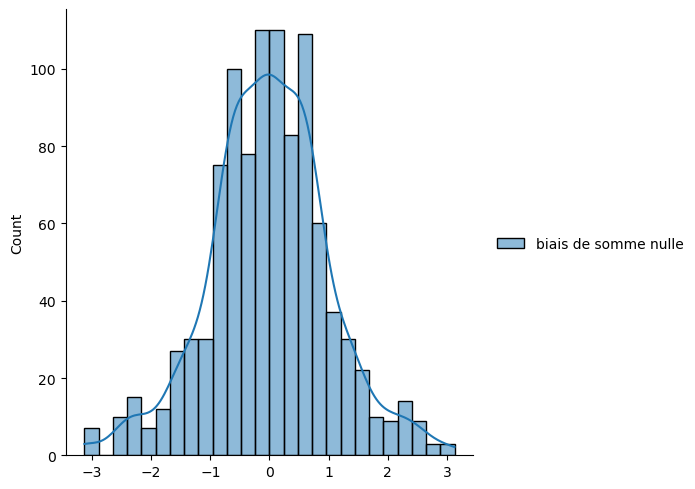

In [22]:
meta_df=afficher_histogramme_et_enregistrer_stat("100_entities_10_samples/score_100_10_4_clean.csv",meta_df)

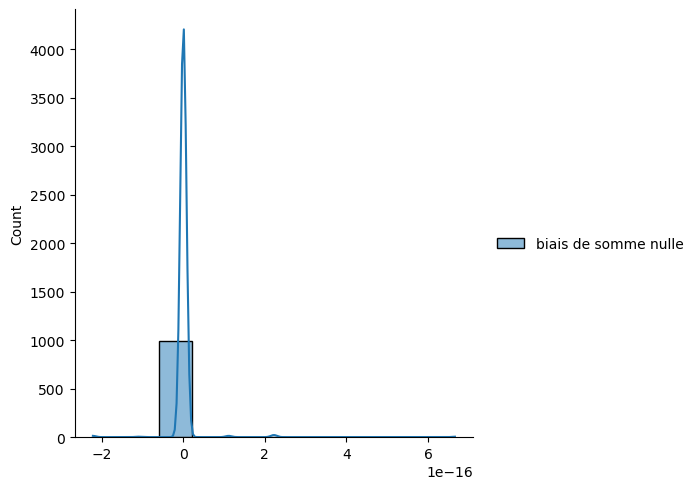

In [23]:
meta_df=afficher_histogramme_et_enregistrer_stat("100_entities_10_samples/score_100_10_5_clean.csv",meta_df)

In [24]:
meta_df

,file,biais_sn_moyen,biais_sn_std,biais_sn_min,biais_sn_max,biais_sn_med
0,score_clean.csv,-0.126643,2.358996,-7.80187,7.148491,-0.066423
0,score2_clean.csv,0.078222,2.065059,-5.910564,7.338547,-0.000626
0,score3_clean.csv,0.042924,1.793612,-6.29097,6.983434,0.006462
0,score4_clean.csv,0.022976,2.329054,-6.951238,8.893555,0.092616
0,score5_clean.csv,0.022048,1.877426,-5.997512,5.632666,0.01805
0,13_entities_10_samples/score_13_1_clean.csv,0.087583,2.021209,-6.087176,5.352387,0.127014
0,13_entities_10_samples/score_13_2_clean.csv,0.028755,1.921753,-7.078223,6.486598,0.104077
0,13_entities_10_samples/score_13_3_clean.csv,-0.103295,1.545445,-5.142056,6.169279,-0.096594
0,13_entities_10_samples/score_13_4_clean.csv,0.006432,2.286032,-8.830887,9.197442,0.096111
0,13_entities_10_samples/score_13_5_clean.csv,-0.012692,2.749759,-8.802162,10.518324,0.049243
